In [44]:
import sys
sys.version
# cuda 10.0
# cudnn 

'3.7.4 (tags/v3.7.4:e09359112e, Jul  8 2019, 20:34:20) [MSC v.1916 64 bit (AMD64)]'

In [27]:
!pip list

Package               Version             
--------------------- --------------------
absl-py               0.8.0               
aiohttp               3.6.2               
asn1crypto            1.1.0               
astor                 0.8.0               
async-timeout         3.0.1               
attrs                 19.2.0              
autovizwidget         0.13.1              
awscli                1.16.251            
backcall              0.1.0               
beautifulsoup4        4.8.1               
bleach                3.1.0               
botocore              1.12.241            
certifi               2019.9.11           
cffi                  1.12.3              
chardet               3.0.4               
cloudpickle           1.2.2               
colorama              0.4.1               
cryptography          2.7                 
cycler                0.10.0              
decorator             4.4.0               
defusedxml            0.6.0               
distro     

You are using pip version 19.0.3, however version 19.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras import utils
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [25]:
y_train_oh = utils.to_categorical(y_train)
y_test_oh = utils.to_categorical(y_test)

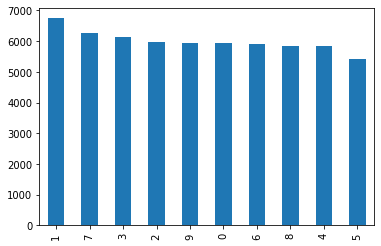

In [8]:
pd.Series(y_train).value_counts().plot(kind='bar')
plt.show()

In [14]:
28 * 28 * 32 + 32

25120

In [13]:
from keras import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units= 32, activation= 'relu', input_dim=784) )
model.add(Dense(10, activation='softmax'))
model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [16]:
X_train.shape

(60000, 28, 28)

In [17]:
model.fit?

In [26]:
# 模型訓練
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train.reshape(60000, 784), y_train_oh, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 16s 330us/step - loss: 2.5835 - accuracy: 0.5392 - val_loss: 1.0063 - val_accuracy: 0.7125
Epoch 2/10
48000/48000 [==============================] - 14s 293us/step - loss: 0.8472 - accuracy: 0.7696 - val_loss: 0.6335 - val_accuracy: 0.8360
Epoch 3/10
48000/48000 [==============================] - 13s 271us/step - loss: 0.6060 - accuracy: 0.8324 - val_loss: 0.5596 - val_accuracy: 0.8509
Epoch 4/10
48000/48000 [==============================] - 14s 284us/step - loss: 0.5040 - accuracy: 0.8669 - val_loss: 0.4603 - val_accuracy: 0.8927
Epoch 5/10
48000/48000 [==============================] - 13s 269us/step - loss: 0.4223 - accuracy: 0.8909 - val_loss: 0.4200 - val_accuracy: 0.9018
Epoch 6/10
48000/48000 [==============================] - 15s 311us/step - loss: 0.3699 - accuracy: 0.9056 - val_loss: 0.3550 - val_accuracy: 0.9163
Epoch 7/10
48000/48000 [==============================] 

In [45]:
# 看精準度
model.evaluate(X_train.reshape(60000, 784), y_train_oh)[1], \
model.evaluate(X_test.reshape(10000, 784), y_test_oh)[1]

10000/10000 [==============================] - 1s 124us/step


(0.9169999957084656, 0.9068999886512756)

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


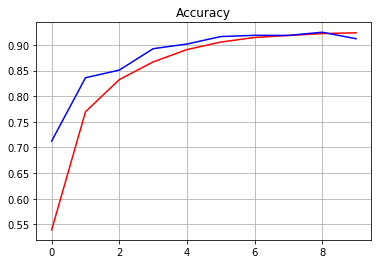

In [36]:
print(history.history.keys())

plt.plot(history.history['accuracy'], color='red')
plt.plot(history.history['val_accuracy'], color='blue')
plt.title('Accuracy')
plt.grid()
plt.show()

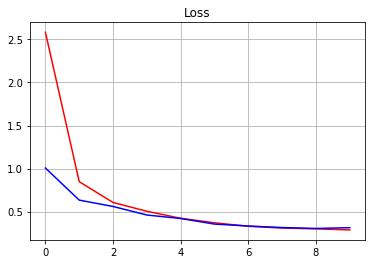

In [37]:
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='blue')
plt.title('Loss')
plt.grid()
plt.show()